## Sounds of Summer '23: Executive Summary

Thank you all for putting up with my incessant reminders and anal instructions.  I hope you've gotten even just a fraction of my enjoyment out of the third or fourth annual (depending on how you count) music draft.  This "event" isn't possible without your participation yada yada yada.


### Methodology

For the curious, this page has all the source code I used to tabulate scores embedded within it for your viewing pleasure.  If you just want to know who won, keep scrolling!

It's not pretty since I had to hack together some columns due to *cough* some hiccups with scoring, but hopefully it's legible and transparent!

#### 1. Scraping Playlist Submissions

In [2]:
# Spotify authentication token I got from viewing network logs while logging in.  
# This token has since expired, but is the temporary "secret passphrase" that lets me write write code to 
# interact with spotify as a logged in user via python code 
access_token = "BQBqwKdyy9EhugjRbH-DimPOB6IIpF490rLW4gPNV3N_htqkDdsToepH13KFyQCq51eIV4fPAqeiQLbUoVIo1Ct72YJtGJRGe6UQ_Jm2yXo4KMwLQPF7bSRPNVNQ39srrSQQyyA5uZ4u8S5O7B6mexj0gsM8r1khsEnrGoTsxxLtCXfc1fMaJFi-kViuvC0aOLywLK8Z6QWg"


# The playlist links you submitted via that Google Form 
# (I used some online tool to convert Kang's playlist from an Apple Music playlist to a Spotify playlist)
# ((don't worry, I covered my eyes so I didn't see which songs were his))
playlist_urls = [
    "https://open.spotify.com/playlist/3QzSX4CkKfuETvMMR3A7dO?si=VZuKhNACRgaeSIBtf90j-A", # Howie13
    "https://open.spotify.com/playlist/5YsmZ0wNU9Hup88j9OFpaC?si=kU2ZMZKWTImKKmDdnaAtZw", # Jack
    "https://open.spotify.com/playlist/78HN95pOyNp08Xqax7Rnlq?si=iAkF87RISEKfVT-vD1dmuQ", # plotsmurphy
    "https://open.spotify.com/playlist/5zz59Zd5gveJWe5FcS7yCX?si=9GNmRVxxSMeEyAtur4Klaw", # maggieggh
    "https://open.spotify.com/playlist/7Ip4k9yCM1yDQBOXG0vKn4?si=84wLwO4oSqyFJ2HmMWKlxQ", # chuckles2016
    "https://open.spotify.com/playlist/2mckH7z17EllIA137scq1p?si=ff742d2c89614aaa", # kang
    "https://open.spotify.com/playlist/6o5sM69b5mPsjC76oRKfiw?si=18a51b08e88e46de", # Juan
]

base_url = "https://api.spotify.com/v1/playlists/"

authors = [
    "Howie13", 
    "Jack", 
    "plotsmurphy", 
    "maggieggh", 
    "chuckles2016", 
    "kang", 
    "Juan"
]

# A helper function which extracts the ID from one of the above playlist URLs
# e.g. 
#  "https://open.spotify.com/playlist/3QzSX4CkKfuETvMMR3A7dO?si=VZuKhNACRgaeSIBtf90j-A"
# gets converted into 
#  "3QzSX4CkKfuETvMMR3A7dO?si=VZuKhNACRgaeSIBtf90j-A"
def get_id_from_url(url):
    try:
        split = url.split('/')
        return split[4]
    except IndexError: 
        print(f"get_id_from_url incorrect format for url: {url}")


# A function which calls the Spotify API with my access_token and saves all the playlists to a JSON file
def fetch_playlists():
    
    # loop over each submission link and author
    for url, author in zip(playlist_urls, authors):
        # get the id from the URL link
        id = get_id_from_url(url)
        
        # Build a new URL out of the base_url and playlist ID
        url = f"{base_url}{id}"

        # Build some HTTP headers to include in the request to the API
        headers = CaseInsensitiveDict()
        headers["Authorization"] = f"Bearer {access_token}"
        
        # call the Spotify API
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            # convert the response to a JSON string
            payload = json.loads(res.content.decode('utf-8'))
            
            # save the response to a file
            with open(f"playlists/{author}.json", "w") as f:
                f.write(res.content.decode('utf-8'))
        else:
            print(f"encountered an error with {author}'s playlist: {res}")

#### 2. Parsing the saved playlists

The Spotify API returns a huge object containing more info about each song that we need for voting.  Here's an abbreviated view of what the whole JSON response looks like, this is all for just _one songs_: 

```json
plotsmurphy.json = 

{
  "collaborative" : false,
  "description" : "",
  "external_urls" : {
    "spotify" : "https://open.spotify.com/playlist/78HN95pOyNp08Xqax7Rnlq"
  },
  "followers" : {
    "href" : null,
    "total" : 0
  },
  "href" : "https://api.spotify.com/v1/playlists/78HN95pOyNp08Xqax7Rnlq",
  "id" : "78HN95pOyNp08Xqax7Rnlq",
  "images" : [ {
    "height" : 640,
    "url" : "https://mosaic.scdn.co/640/ab67616d0000b2732b6d651ad0167b0cf8024ba5ab67616d0000b27342291128b404448866c8a557ab67616d0000b273db020a0fa29fa8091b6da954ab67616d0000b273f782f5b9c6c419e4fd261175",
    "width" : 640
  }, ... ],
  "name" : "Sounds of Summer 23 submission",
  "owner" : {
    "display_name" : "plotsmurphy",
    "external_urls" : {
      "spotify" : "https://open.spotify.com/user/plotsmurphy"
    },
    "href" : "https://api.spotify.com/v1/users/plotsmurphy",
    "id" : "plotsmurphy",
    "type" : "user",
    "uri" : "spotify:user:plotsmurphy"
  },
  "primary_color" : null,
  "public" : false,
  "snapshot_id" : "MjcsZWZiNDczNTQxMDkyYzk2MmQ3YmE4N2U0Y2FlZmU0ODM3MzIzNDY1NQ==",
  "tracks" : {
    "href" : "https://api.spotify.com/v1/playlists/78HN95pOyNp08Xqax7Rnlq/tracks?offset=0&limit=100",
    "items" : [ {
      "added_at" : "2023-05-08T14:39:31Z",
      "added_by" : {
        "external_urls" : {
          "spotify" : "https://open.spotify.com/user/plotsmurphy"
        },
        "href" : "https://api.spotify.com/v1/users/plotsmurphy",
        "id" : "plotsmurphy",
        "type" : "user",
        "uri" : "spotify:user:plotsmurphy"
      },
      "is_local" : false,
      "primary_color" : null,
      "track" : {
        "album" : {
          "album_type" : "album",
          "artists" : [ {
            "external_urls" : {
              "spotify" : "https://open.spotify.com/artist/6vCs4rj3rvYAX3l7dEiPq9"
            },
            "href" : "https://api.spotify.com/v1/artists/6vCs4rj3rvYAX3l7dEiPq9",
            "id" : "6vCs4rj3rvYAX3l7dEiPq9",
            "name" : "Marietta",
            "type" : "artist",
            "uri" : "spotify:artist:6vCs4rj3rvYAX3l7dEiPq9"
          } ],
          "available_markets" : [ "AD", "AE", "AG", "AL", "AM", "AO", ..., "ZW" ],
          "external_urls" : {
            "spotify" : "https://open.spotify.com/album/1SYDjwymTAVIIpJcu2y30K"
          },
          "href" : "https://api.spotify.com/v1/albums/1SYDjwymTAVIIpJcu2y30K",
          "id" : "1SYDjwymTAVIIpJcu2y30K",
          "images" : [ {
            "height" : 640,
            "url" : "https://i.scdn.co/image/ab67616d0000b273f782f5b9c6c419e4fd261175",
            "width" : 640
          }, ...],
          "name" : "Summer Death",
          "release_date" : "2013-11-08",
          "release_date_precision" : "day",
          "total_tracks" : 8,
          "type" : "album",
          "uri" : "spotify:album:1SYDjwymTAVIIpJcu2y30K"
        },
        "artists" : [ {
          "external_urls" : {
            "spotify" : "https://open.spotify.com/artist/6vCs4rj3rvYAX3l7dEiPq9"
          },
          "href" : "https://api.spotify.com/v1/artists/6vCs4rj3rvYAX3l7dEiPq9",
          "id" : "6vCs4rj3rvYAX3l7dEiPq9",
          "name" : "Marietta",
          "type" : "artist",
          "uri" : "spotify:artist:6vCs4rj3rvYAX3l7dEiPq9"
        } ],
        "available_markets" : [ "AR", "AU", "AT",..., "XK" ],
        "disc_number" : 1,
        "duration_ms" : 271339,
        "episode" : false,
        "explicit" : true,
        "external_ids" : {
          "isrc" : "ushm91390027"
        },
        "external_urls" : {
          "spotify" : "https://open.spotify.com/track/6Xaj8GsQdL80McMIBW9IzJ"
        },
        "href" : "https://api.spotify.com/v1/tracks/6Xaj8GsQdL80McMIBW9IzJ",
        "id" : "6Xaj8GsQdL80McMIBW9IzJ",
        "is_local" : false,
        "name" : "Cinco De Mayo Shit Show",
        "popularity" : 46,
        "preview_url" : "https://p.scdn.co/mp3-preview/55b59d8adcada4d217e6f72b616c999302aafa12?cid=cfdbb3a977dd449fb024cc36884fcf41",
        "track" : true,
        "track_number" : 2,
        "type" : "track",
        "uri" : "spotify:track:6Xaj8GsQdL80McMIBW9IzJ"
      },
      "video_thumbnail" : {
        "url" : null
      }
    }, ... (more songs)
```

So we need to pare down each JSON file into _just_ the stuff we care about. 

In [3]:
def parse_json(): 
    
    # helper function which re-maps the metadata we need for the spreadsheet
    # and joins the "artist(s)" column into a single string if there's multiple artists
    def reduce_json(j, k):
        return {
            "k": k,
            "title": j["track"]["name"],
            "link": j["track"]["external_urls"]["spotify"],
            "artist": ', '.join(list(map(lambda artist: artist["name"], j["track"]["artists"]))),
            "duration_ms": j["track"]["duration_ms"],
            
        }
    
        # we're going to convert each JSON file into a dictionary (key, value pairs)
        """ e.g. 
        
        playlist_dict = {
          plotsmurphy = [
            song1 = {
              title: "some title"
              artist: "some artists(s)"
              link: "the url to the original song"
              ... 
            },
            song2 = { ...}
          
          ]
          Howie = [ ... list of howards songs]
          ... 
        }
        """
        
        # we start with an empty dictionary
        playlist_dict = {}
        
        # load the saved JSON files
        for a in authors:
            with open(f"playlists/{a}.json", "r") as f:
                # add each author to the dictionary
                playlist_dict[a] = json.loads(f.read())
            
        # extract just the information we want from each song in each playlist
        # this calls the reduce_json() function above
        playlists_as_lists = [list(map(reduce_json, playlist_dict[k]["tracks"]["items"], [k] * len(playlist_dict[k]["tracks"]["items"]))) for k in playlist_dict.keys()]    
        
        return playlists_as_lists

#### 3. Create Batches for voting

Now that we have all the playlist data we care about, we can create voting batches.

Recall that each batch should have one song from each participant, randomly selected from all of their song submissions, and each batch should be shuffled so we can't tell who's song is whose.

In [5]:

def create_round(playlists):
    groups = []
    
    # 25 batches of len 7
    for i in range(25):
        # remove a random song from each playlist and put it in the batch
        batch = [curr.pop(random.randrand(len(curr))) for curr in playlists]
        
        # shuffle each batch in place for anonymity
        random.shuffle(batch)
        
        # add the batch to the group
        groups.append(batch)
        
        
    # save the group of batches to a CSV that can be imported back into google sheets
    with open("playlists/round_1_voting.csv", "w") as f:
        writer = csv.writer(f)
        for group in groups:
            for batch in group:
                writer.writerow(list(batch.values))
            writer.writerow([])

Great, so that's how we get the sheet I imported into the master sheet, and then just deleted/combined some columns for readability

### 4. Reading scores from Round 1 and re-shuffling for Round 2

The process for "validating" scores and building the sheet for Round 2 is very similar, we just have a few more columns for the scores from the previous round we want to keep track of as well.

This is also where some hacky stuff comes into play (if you thought any of the above spaghetti code was hacky, just u wait).  Not throwing shade at all in this section, just explaining the fascinating challenges I encountered with data cleaning.

Juan's scores were late from Round 1, so we decided to just impute an average of 3.5 till he could get round 1 scores in.  That was easy enough.

In [1]:
# returns a dictionary keyed by author with all their songs and their current scores
def validate_scores():
    round1_results = {}
        
    with open("playlists/round_1_results.csv", "r") as f:
        reader = csv.reader(f)
        for line in reader:
            # skip blank lines between batches as well as the first line which is just column headers
            if not line[0].startswith('') and not line[0] == "ID":
                # unpack the line into individual vars for each column
                author, title, url, artist, duration, duration_fmt, total_score, jack_r1, peter_r1, charlie_r1, _, kang_r1, maggie_r1, howard_r1 = line
                
                # just swap out the "juan_r1" entry for his actual scores when they're ready
                payload = {
                                "author": author,
                                "title": title,
                                "link": url,
                                "artist": artist,
                                "duration_ms": duration,
                                "jack_r1": jack_r1,
                                "peter_r1": peter_r1,
                                "charlie_r1": charlie_r1,
                                "juan_r1": 3.5, # juan_r1,
                                "kang_r1": kang_r1,
                                "maggie_r1": maggie_r1,
                                "howard_r1": howard_r1,
                            }
                
                payload["total_score"] = sum(
                                [
                                    float(payload["jack_r1"]),
                                    float(payload["peter_r1"]),
                                    float(payload["charlie_r1"]),
                                    float(payload["juan_r1"]),
                                    float(payload["kang_r1"]),
                                    float(payload["maggie_r1"]),
                                    float(payload["howard_r1"])
                                ]
                )
                
                # "un-shuffle" the spreadsheet back into a dictionary grouped by author with song scores
                if author in round1_results:
                    round1_results[author].append(payload)
                else:
                    round1_results[author] = [payload]

Once again, we can reuse this method for round 2 scores and have a whole snapshot of voting history.  But here's where we run into some challenges.

I take full responsibility for ambiguous instructions on voting, but some folks were scoring the songs _out of 7_ rather than ranking them as 1st favorite (= seven points), 2nd favorite (= six points), ..., least favorite song in a batch = 1 point.  

This potentially throws off the scoring, and at this stage of the draft, it's too late to ask folks to amend their scores for multiple rounds worth of voting, especially after I've been militantly harping in the gc about getting scores in by the (incorrect) due date.

Fun is the guiding principle of this whole thing, and after consulting with jack and charlie about the best way to amend the data without "violating the integrity of the election," I think we came to a decent compromise.

Each of us were alotted (7 + 6 + 5 + 4 + 3 + 2 + 1) * 25 = 28 votes per round with the intention being that we use one discrete vote of each value per batch. No two songs in any batch _should_ receive the same score from any one voter, and the total value of votes cast by a voter in a given batch should equal 28, for a total _round score_ of 700 points.  

For any "invalid" configuration of votes, I took the total score that participant gave per round, and added/subtracted the average delta from the intended total of 700. 

All the code from above was a cleaned up a bit, but all of the following is executable within this notebook:

In [2]:
import csv

# returns a dictionary keyed by author with all their songs and their current scores
def validate_scores():
    round1_results = {}
    results = {}
        
    # open all the csv files from each round and the adjustments    
    with open("playlists/round_1_results.csv", "r") as f1, open("playlists/Juan Scoring Sheet - Round 1.csv", "r") as f2:
            reader1 = csv.reader(f1) # round 1 scores
            reader2 = csv.reader(f2) # late round 1scores 
            for line_r1, line_j in zip(reader1, reader2):
                    # skip blank lines between batches as well as the first line which is just column headers
                    if not line_r1[0].startswith("END OF BATCH") and not line_r1[0] == "ID":
                        # unpack the line from round 1 file into individual vars for each column
                        author, title, url, artist, duration, duration_fmt, total_score, jack_r1, peter_r1, charlie_r1, _, kang_r1, maggie_r1, howard_r1 = line_r1

                        # do the same for missing scores
                        _, _, _, juan_r1, _ = line_j

                        payload = {
                                        "author": author,
                                        "title": title,
                                        "link": url,
                                        "artist": artist,
                                        "duration_ms": int(duration),
                                        "jack_r1": float(jack_r1),
                                        "peter_r1": float(peter_r1),
                                        "charlie_r1": float(charlie_r1),
                                        "juan_r1": float(juan_r1),
                                        "kang_r1": float(kang_r1),
                                        "maggie_r1": float(maggie_r1),
                                        "howard_r1": float(howard_r1),
                                    }

                        payload["total_r1"] = sum(
                                        [
                                            float(payload["jack_r1"]),
                                            float(payload["peter_r1"]),
                                            float(payload["charlie_r1"]),
                                            float(payload["juan_r1"]),
                                            float(payload["kang_r1"]),
                                            float(payload["maggie_r1"]),
                                            float(payload["howard_r1"])
                                        ]
                        )
                        
                        # in the business of data science, this is a warcrime
                        # "un-shuffle" the spreadsheet back into a dictionary grouped by author with song scores
                        if author in round1_results:
                            round1_results[author].append(payload)
                        else:
                            round1_results[author] = [payload]
                        
                        if author in results:
                            results[author][title] = payload
                        else: 
                            results[author] = {}
                            results[author][title] = payload
                        
                        
    round2_results = {}
    with open("playlists/round_2_voting_results.csv", "r") as f3:
        reader = csv.reader(f3)
        for line in reader:
            if not line[0].startswith("END OF BATCH") and not line[0] == "Id":
                author, title, artists, duration, r1_total, r2_total, grand_total, jack_r2, peter_r2, charlie_r2, juan_r2, kang_r2, maggie_r2, howard_r2 = line
                

                # convert missing scores to 3.5
                def floatOrElse(string):
                    if string == '': return 3.5
                    else: return float(string)
                
                jack_r2f = floatOrElse(jack_r2)
                peter_r2f = floatOrElse(peter_r2)
                charlie_r2f = floatOrElse(charlie_r2)
                juan_r2f = floatOrElse(juan_r2)
                kang_r2f = floatOrElse(kang_r2)
                maggie_r2f = floatOrElse(maggie_r2)
                howard_r2f = floatOrElse(howard_r2)
                
                # should be able to lookup scores by composite/nested key of author + title                
                payload = {
                    "jack_r2": jack_r2f,
                    "peter_r2": peter_r2f,
                    "charlie_r2": charlie_r2f,
                    "juan_r2": juan_r2f,
                    "kang_r2": kang_r2f,
                    "maggie_r2": maggie_r2f,
                    "howard_r2": howard_r2f,
                }
                
                payload["total_r2"] = sum(list(payload.values()))
                
                results[author][title].update(payload)
                results[author][title]["total"] = results[author][title]["total_r1"] + results[author][title]["total_r2"]

    return results

results = validate_scores()
results

{'plotsmurphy': {"(Sittin' On) the Dock of the Bay": {'author': 'plotsmurphy',
   'title': "(Sittin' On) the Dock of the Bay",
   'link': 'https://open.spotify.com/track/3zBhihYUHBmGd2bcQIobrF',
   'artist': 'Otis Redding',
   'duration_ms': 163755,
   'jack_r1': 5.0,
   'peter_r1': 7.0,
   'charlie_r1': 5.0,
   'juan_r1': 2.0,
   'kang_r1': 1.0,
   'maggie_r1': 6.0,
   'howard_r1': 6.0,
   'total_r1': 32.0,
   'jack_r2': 5.0,
   'peter_r2': 7.0,
   'charlie_r2': 7.0,
   'juan_r2': 4.0,
   'kang_r2': 7.0,
   'maggie_r2': 2.0,
   'howard_r2': 5.0,
   'total_r2': 37.0,
   'total': 69.0},
  'Wild Horses': {'author': 'plotsmurphy',
   'title': 'Wild Horses',
   'link': 'https://open.spotify.com/track/4M4Q3JLsUbyTkd5WHty1WB',
   'artist': 'The Rolling Stones',
   'duration_ms': 342586,
   'jack_r1': 4.0,
   'peter_r1': 7.0,
   'charlie_r1': 4.0,
   'juan_r1': 3.0,
   'kang_r1': 2.0,
   'maggie_r1': 3.0,
   'howard_r1': 5.0,
   'total_r1': 28.0,
   'jack_r2': 6.0,
   'peter_r2': 7.0,
   'cha

In [3]:
# Fix Juan's scores
# no, not "fix" like that, I mean adjust them – don't look at me like that

juan_r1_total = 0
target_round_total = (1 + 2 + 3 + 4 + 5 + 6 + 7) * 25

for author in results:
    for song in results[author]:
        # print(results[author][song]["juan_r1"])
        juan_r1_total += results[author][song]["juan_r1"]

delta = target_round_total - juan_r1_total
delta_per_song = round(delta / (25 * 7) * 100) / 100
print(f"Juan round 1 total was abs({juan_r1_total} - {target_round_total}) = {delta}")
print(f"so each of his scores for round 1 should be bumped up by {delta} / 175 = {delta_per_song}")

# do that
for author in results:
    for song in results[author]:
        # print(results[author][song]["juan_r1"])
        results[author][song]["juan_r1"] += delta_per_song

Juan round 1 total was abs(628.0 - 700) = 72.0
so each of his scores for round 1 should be bumped up by 72.0 / 175 = 0.41


In [4]:
# and repeat for round 2
juan_r2_total = 0

for author in results:
    for song in results[author]:
        # print(results[author][song]["juan_r1"])
        juan_r2_total += results[author][song]["juan_r2"]

delta = abs(juan_r2_total - target_round_total)
delta_per_song = round(delta / (25 * 7) * 100) / 100
print(f"Juan round 2 total was {juan_r2_total} - {target_round_total} = {delta}")
print(f"so each of his scores for round 1 should be bumped up by {delta} / 175 = {delta_per_song}")

# do that
for author in results:
    for song in results[author]:
        # print(results[author][song]["juan_r1"])
        results[author][song]["juan_r1"] += delta_per_song

Juan round 2 total was 698.0 - 700 = 2.0
so each of his scores for round 1 should be bumped up by 2.0 / 175 = 0.01


In [5]:
# and finally, let's unpack all those scores into a flat list so we can shove it in a dataframe
import pandas 
flattened = [] 
for author in results.keys():
    for song in results[author].keys():
        flattened.append(results[author][song])
        
df = pandas.DataFrame(flattened)
df.to_csv("final.csv")
df

,author,title,link,artist,duration_ms,jack_r1,peter_r1,charlie_r1,juan_r1,kang_r1,...,total_r1,jack_r2,peter_r2,charlie_r2,juan_r2,kang_r2,maggie_r2,howard_r2,total_r2,total
0,plotsmurphy,(Sittin' On) the Dock of the Bay,https://open.spotify.com/track/3zBhihYUHBmGd2b...,Otis Redding,163755,5.0,7.0,5.0,2.42,1.0,...,32.0,5.0,7.0,7.0,4.0,7.0,2.0,5.0,37.0,69.0
1,plotsmurphy,Wild Horses,https://open.spotify.com/track/4M4Q3JLsUbyTkd5...,The Rolling Stones,342586,4.0,7.0,4.0,3.42,2.0,...,28.0,6.0,7.0,7.0,3.0,3.0,6.0,3.0,35.0,63.0
2,plotsmurphy,Mountain Dew Me,https://open.spotify.com/track/3oJZ6P1F52dHMMc...,Loudmouth,100000,3.0,6.0,3.0,1.42,7.0,...,28.0,2.0,7.0,5.0,1.0,1.0,4.0,4.0,24.0,52.0
3,plotsmurphy,Cut From The Cloth,https://open.spotify.com/track/5gFfJgQe7fq1N3A...,The Evens,311506,5.0,6.0,2.0,2.42,4.0,...,26.0,2.0,6.0,3.0,2.0,4.0,3.0,3.0,23.0,49.0
4,plotsmurphy,99 Corolla,https://open.spotify.com/track/1AYINMMHj2oFsFn...,Medium Build,168093,5.0,6.0,3.0,3.42,5.0,...,27.0,3.0,4.0,7.0,3.0,5.0,3.0,6.0,31.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,chuckles2016,Island Song,https://open.spotify.com/track/273gNDaG3xT0ulM...,Zac Brown Band,223306,4.0,1.0,5.0,4.42,6.0,...,28.0,3.0,1.0,4.0,6.0,1.0,6.0,5.0,26.0,54.0
171,chuckles2016,Good Vibes,https://open.spotify.com/track/1XVqh0dC0PIl72f...,Chris Janson,165586,7.0,3.0,6.0,2.42,1.0,...,31.0,4.0,1.0,5.0,7.0,5.0,1.0,4.0,27.0,58.0
172,chuckles2016,Tequila Little Time,https://open.spotify.com/track/15npbUjCgwt2lRv...,Jon Pardi,207161,4.0,4.0,5.0,2.42,1.0,...,19.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,16.0,35.0
173,chuckles2016,Afraid To Feel,https://open.spotify.com/track/40SBS57su9xLiE1...,LF SYSTEM,177524,2.0,4.0,4.0,4.42,3.0,...,24.0,3.0,1.0,5.0,4.0,5.0,3.0,2.0,23.0,47.0


fucking yuck lol

## Results!!!!!!!!


Okay now for "real" datascience where we can find out who won

In [6]:
import pandas as pd

df.groupby('author').sum(True).sort_values(by=['total'], ascending=False)

,duration_ms,jack_r1,peter_r1,charlie_r1,juan_r1,kang_r1,maggie_r1,howard_r1,total_r1,jack_r2,peter_r2,charlie_r2,juan_r2,kang_r2,maggie_r2,howard_r2,total_r2,total
author,,,,,,,,,,,,,,,,,,
Howie13,5347851,100.0,90.0,110.0,108.5,94.0,100.0,149.0,741.0,88.0,103.0,118.0,110.0,92.0,104.0,159.0,774.0,1515.0
Jack,6027848,145.0,122.0,97.0,92.5,92.0,108.0,85.0,731.0,159.0,123.0,101.0,96.0,97.0,105.0,94.0,775.0,1506.0
Juan,6361131,98.0,93.0,106.0,149.5,98.0,83.0,106.0,723.0,94.0,84.0,79.0,157.0,97.0,82.0,115.0,708.0,1431.0
maggieggh,5145144,105.0,78.0,86.0,110.5,107.0,172.0,56.0,704.0,126.0,70.0,92.0,113.0,101.0,152.0,67.0,721.0,1425.0
plotsmurphy,5577096,74.0,160.0,105.0,66.5,85.0,68.0,128.0,676.0,71.0,159.0,126.0,67.0,85.0,93.0,106.0,707.0,1383.0
kang,4929580,70.0,58.0,86.0,98.5,155.0,87.0,92.0,636.0,69.0,70.0,75.0,88.0,152.0,85.0,85.0,624.0,1260.0
chuckles2016,5252379,103.0,100.0,110.0,75.5,69.0,82.0,85.0,614.0,93.0,85.0,109.0,67.0,76.0,72.0,74.0,576.0,1190.0


probably copy the above thing into a sheet and highlight the max from each


### They call me DJ Analytics

#### Who got the most points + runtime

In [7]:
by_points = df.groupby('author')['total'].sum()
by_points.sort_values(ascending=False)

author
Howie13         1515.0
Jack            1506.0
Juan            1431.0
maggieggh       1425.0
plotsmurphy     1383.0
kang            1260.0
chuckles2016    1190.0
Name: total, dtype: float64

In [8]:
def convertMillis(x):
    millis = float(x)
    seconds = float(millis / 1000 ) % 60
    minutes = float(millis / (1000*60)) % 60
    hours = float(millis / (1000*60*60)) % 24
    days = float(millis / (1000*60*60*24))  

    return f"{hours:3f}:{minutes:02f}:{seconds:02f}" # return seconds, minutes, hours

        
df['duration_ms'] = df['duration_ms'].astype(float)
by_duration = df.groupby('author')['duration_ms'].sum()
total_runtime_ms = by_duration.sum()
print(f"{total_runtime_ms=}")
print(by_duration.apply(lambda x: f"{round(x / total_runtime_ms * 100, 2)} %"))


total_runtime_ms=38641029.0
author
Howie13         13.84 %
Jack             15.6 %
Juan            16.46 %
chuckles2016    13.59 %
kang            12.76 %
maggieggh       13.32 %
plotsmurphy     14.43 %
Name: duration_ms, dtype: object


#### Distribution of votes
sum up the amount of points given by each person

In [9]:
df.groupby('author').sum(True)

,duration_ms,jack_r1,peter_r1,charlie_r1,juan_r1,kang_r1,maggie_r1,howard_r1,total_r1,jack_r2,peter_r2,charlie_r2,juan_r2,kang_r2,maggie_r2,howard_r2,total_r2,total
author,,,,,,,,,,,,,,,,,,
Howie13,5347851.0,100.0,90.0,110.0,108.5,94.0,100.0,149.0,741.0,88.0,103.0,118.0,110.0,92.0,104.0,159.0,774.0,1515.0
Jack,6027848.0,145.0,122.0,97.0,92.5,92.0,108.0,85.0,731.0,159.0,123.0,101.0,96.0,97.0,105.0,94.0,775.0,1506.0
Juan,6361131.0,98.0,93.0,106.0,149.5,98.0,83.0,106.0,723.0,94.0,84.0,79.0,157.0,97.0,82.0,115.0,708.0,1431.0
chuckles2016,5252379.0,103.0,100.0,110.0,75.5,69.0,82.0,85.0,614.0,93.0,85.0,109.0,67.0,76.0,72.0,74.0,576.0,1190.0
kang,4929580.0,70.0,58.0,86.0,98.5,155.0,87.0,92.0,636.0,69.0,70.0,75.0,88.0,152.0,85.0,85.0,624.0,1260.0
maggieggh,5145144.0,105.0,78.0,86.0,110.5,107.0,172.0,56.0,704.0,126.0,70.0,92.0,113.0,101.0,152.0,67.0,721.0,1425.0
plotsmurphy,5577096.0,74.0,160.0,105.0,66.5,85.0,68.0,128.0,676.0,71.0,159.0,126.0,67.0,85.0,93.0,106.0,707.0,1383.0


#### Times we picked ourselves

     round 1  round 2
7.0        9     16.0
6.0        9      4.0
5.0        4      3.0
4.0        1      2.0
3.0        1      NaN
1.0        1      NaN


<Axes: xlabel='score', ylabel='frequency'>

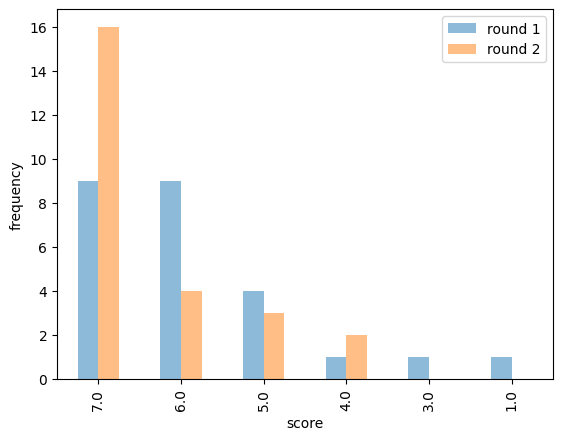

In [10]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'Jack']['jack_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'Jack']['jack_r2'].value_counts()})
jack_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(jack_self_votes)
jack_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

     round 1  round 2
7.0     13.0       15
6.0      9.0        6
5.0      3.0        2
4.0      NaN        2


<Axes: xlabel='score', ylabel='frequency'>

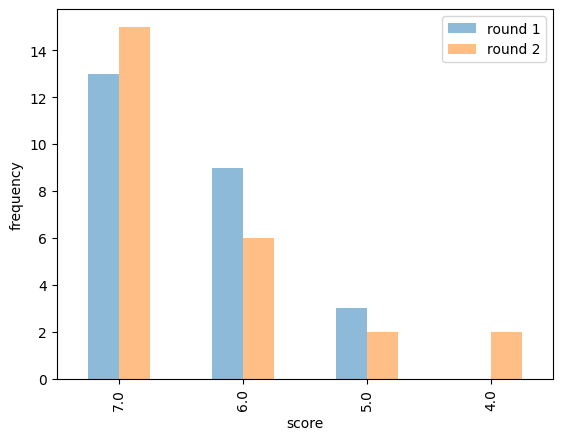

In [11]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'plotsmurphy']['peter_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'plotsmurphy']['peter_r2'].value_counts()})
peter_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(peter_self_votes)
peter_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

     round 1  round 2
7.0      1.0        2
6.0      6.0        5
5.0      4.0        6
4.0      7.0        5
3.0      5.0        3
2.0      2.0        2
1.0      NaN        2


<Axes: xlabel='score', ylabel='frequency'>

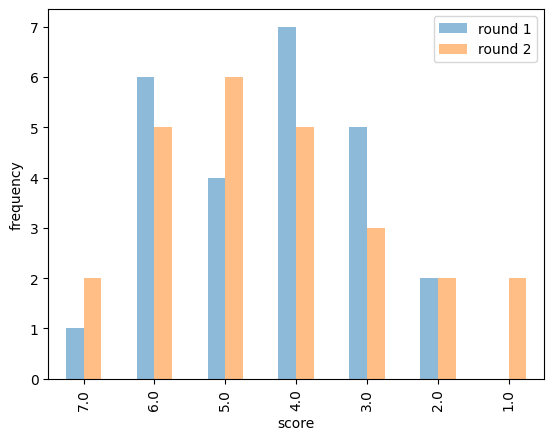

In [12]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'chuckles2016']['charlie_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'chuckles2016']['charlie_r2'].value_counts()})
charlie_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(charlie_self_votes)
charlie_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

     round 1  round 2
7.0     23.0       14
6.0      1.0        4
5.0      1.0        3
4.0      NaN        2
3.5      NaN        2


<Axes: xlabel='score', ylabel='frequency'>

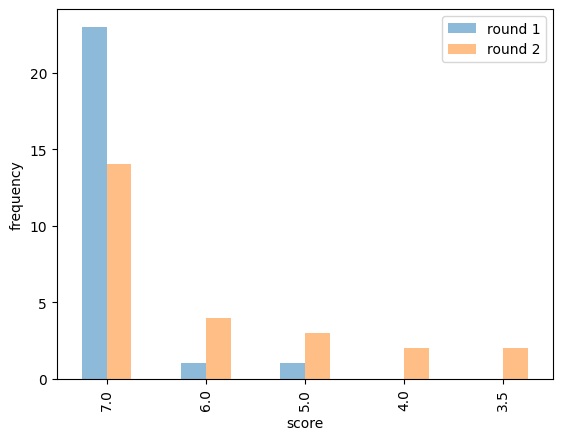

In [13]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'maggieggh']['maggie_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'maggieggh']['maggie_r2'].value_counts()})
maggie_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(maggie_self_votes)
maggie_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

      round 1  round 2
7.42      3.0      NaN
7.00      NaN     16.0
6.42     11.0      NaN
6.00      NaN      3.0
5.42      8.0      NaN
5.00      NaN      4.0
4.42      3.0      NaN
4.00      NaN      1.0
3.00      NaN      1.0


<Axes: xlabel='score', ylabel='frequency'>

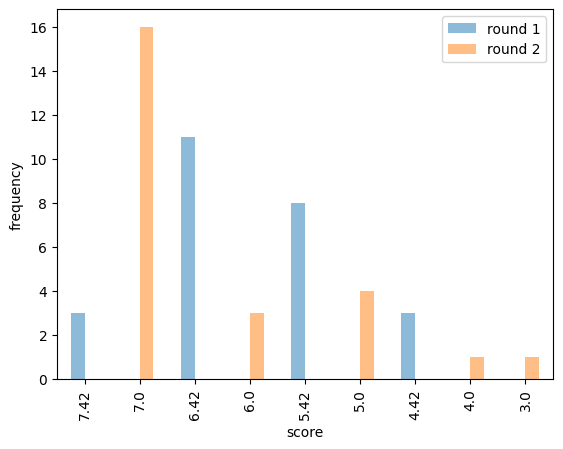

In [14]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'Juan']['juan_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'Juan']['juan_r2'].value_counts()})
juan_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(juan_self_votes)
juan_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

     round 1  round 2
7.0     12.0     12.0
6.0      8.0      7.0
5.0      3.0      4.0
4.0      2.0      NaN
3.0      NaN      2.0


<Axes: xlabel='score', ylabel='frequency'>

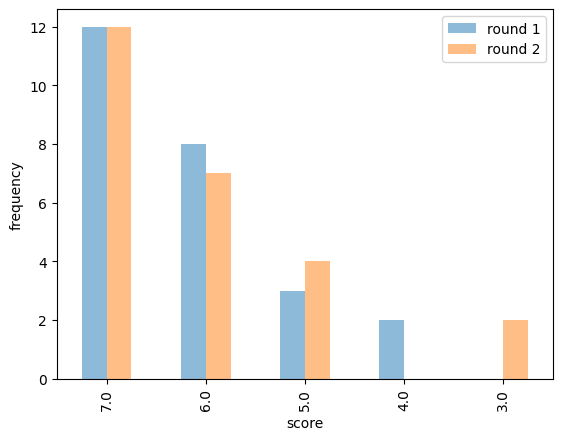

In [15]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'kang']['kang_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'kang']['kang_r2'].value_counts()})
kang_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(kang_self_votes)
kang_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

     round 1  round 2
7.0       12     13.0
6.0        4      9.0
5.0        6      2.0
4.0        2      1.0
3.0        1      NaN


<Axes: xlabel='score', ylabel='frequency'>

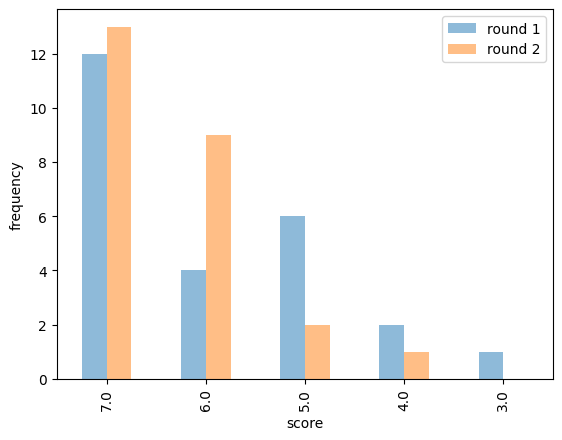

In [16]:
self_votes_r1 = pd.DataFrame({'round 1': df[df['author'] == 'Howie13']['howard_r1'].value_counts()})
self_votes_r2 = pd.DataFrame({'round 2': df[df['author'] == 'Howie13']['howard_r2'].value_counts()})
howard_self_votes = pd.concat([self_votes_r1, self_votes_r2], axis=1).sort_index(ascending=False)
print(howard_self_votes)
howard_self_votes.plot.bar(column=['round 1', 'round 2'], alpha=0.5, xlabel="score", ylabel="frequency")

In [38]:
authors = list(df['author'].unique())
authors = {
    'plotsmurphy': 'peter', 
    'Jack': 'jack', 
    'Howie13': 'howard', 
    'maggieggh': 'maggie', 
    'Juan': 'juan', 
    'kang': 'kang', 
    'chuckles2016': 'charlie'
}
authors

{'plotsmurphy': 'peter',
 'Jack': 'jack',
 'Howie13': 'howard',
 'maggieggh': 'maggie',
 'Juan': 'juan',
 'kang': 'kang',
 'chuckles2016': 'charlie'}

In [56]:
deltas = {}

# for every author
for current_author in authors.keys():
    current_author_deltas = pd.DataFrame(df[df['author'] == current_author])
    deltas[current_author] ={}
    # compare them to every other author
    for other in authors.keys():
        # don't delta yourself
        if other != current_author:
            # get the row name from the column name
            other_lookup = authors[other]
            current_lookup = authors[current_author]
            current_author_deltas[f"{other_lookup}_delta_r1"] = abs(current_author_deltas[f"{current_lookup}_r1"] - current_author_deltas[f"{other_lookup}_r1"])
            current_author_deltas[f"{other_lookup}_delta_r2"] = abs(current_author_deltas[f"{current_lookup}_r2"] - current_author_deltas[f"{other_lookup}_r2"])

            deltas[current_author][other] = {
                "r1": current_author_deltas[f"{other_lookup}_delta_r1"].sum(), 
                "r2": current_author_deltas[f"{other_lookup}_delta_r2"].sum(),
                "total": current_author_deltas[f"{other_lookup}_delta_r1"].sum() + current_author_deltas[f"{other_lookup}_delta_r2"].sum()
            }
    
deltas

{'plotsmurphy': {'Jack': {'r1': 86.0, 'r2': 90.0, 'total': 176.0},
  'Howie13': {'r1': 36.0, 'r2': 67.0, 'total': 103.0},
  'maggieggh': {'r1': 92.0, 'r2': 70.0, 'total': 162.0},
  'Juan': {'r1': 93.5, 'r2': 94.0, 'total': 187.5},
  'kang': {'r1': 79.0, 'r2': 84.0, 'total': 163.0},
  'chuckles2016': {'r1': 59.0, 'r2': 47.0, 'total': 106.0}},
 'Jack': {'plotsmurphy': {'r1': 41.0, 'r2': 42.0, 'total': 83.0},
  'Howie13': {'r1': 70.0, 'r2': 67.0, 'total': 137.0},
  'maggieggh': {'r1': 39.0, 'r2': 62.0, 'total': 101.0},
  'Juan': {'r1': 58.7, 'r2': 63.0, 'total': 121.7},
  'kang': {'r1': 69.0, 'r2': 68.0, 'total': 137.0},
  'chuckles2016': {'r1': 66.0, 'r2': 62.0, 'total': 128.0}},
 'Howie13': {'plotsmurphy': {'r1': 67.0, 'r2': 62.0, 'total': 129.0},
  'Jack': {'r1': 69.0, 'r2': 75.0, 'total': 144.0},
  'maggieggh': {'r1': 63.0, 'r2': 61.0, 'total': 124.0},
  'Juan': {'r1': 49.019999999999996, 'r2': 55.0, 'total': 104.02},
  'kang': {'r1': 77.0, 'r2': 69.0, 'total': 146.0},
  'chuckles2016

In [79]:
for author in deltas:
    mx = 0
    mn = 1e5
    for other in deltas[author].keys():
        # print(other, deltas[author][other]['total'])
        if deltas[author][other]['total'] > mx:
            mx = deltas[author][other]['total']
            print(f"max delta for {author}: {other} = {mx}")
        if deltas[author][other]['total'] < mn:
            mn = deltas[author][other]['total']
            print(f"min delta for {author}: {other} = {mn}")
   
    
    print()
#         if deltas[author][other]['total'] > mx:
#             mx = deltas[author][other][total]

max delta for plotsmurphy: Jack = 176.0
min delta for plotsmurphy: Jack = 176.0
min delta for plotsmurphy: Howie13 = 103.0
max delta for plotsmurphy: Juan = 187.5

max delta for Jack: plotsmurphy = 83.0
min delta for Jack: plotsmurphy = 83.0
max delta for Jack: Howie13 = 137.0

max delta for Howie13: plotsmurphy = 129.0
min delta for Howie13: plotsmurphy = 129.0
max delta for Howie13: Jack = 144.0
min delta for Howie13: maggieggh = 124.0
min delta for Howie13: Juan = 104.02
max delta for Howie13: kang = 146.0

max delta for maggieggh: plotsmurphy = 178.0
min delta for maggieggh: plotsmurphy = 178.0
min delta for maggieggh: Jack = 109.0
max delta for maggieggh: Howie13 = 201.0
min delta for maggieggh: Juan = 105.5

max delta for Juan: plotsmurphy = 141.3
min delta for Juan: plotsmurphy = 141.3
min delta for Juan: Jack = 127.98
min delta for Juan: Howie13 = 105.82
max delta for Juan: maggieggh = 144.66000000000003

max delta for kang: plotsmurphy = 179.0
min delta for kang: plotsmurphy =